<a href="https://colab.research.google.com/github/mtsvi-moraes/mtsvi-moraes/blob/main/python_analise_dados_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando Series e DataFrames com Pandas:**

### **Importando bibliotecas:**

In [170]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

### **Criando e fazendo seleções em Series:**

In [171]:
objeto = pd.Series([1, 2, 3], index=['um', 'dois', 'tres'])

objeto[['um', 'dois']]

um      1
dois    2
dtype: int64

In [172]:
'tres' in objeto   #obs: Procura pelo índice

True

In [173]:
objeto.values

array([1, 2, 3])

In [174]:
objeto.index

Index(['um', 'dois', 'tres'], dtype='object')

### **Convertendo dicionários em Series**

Obs: As chaves se tornam índices e os valores as linhas

In [175]:
estados = {'SP': 44000000, 'MG': 20000000, 'RG': 6748000, 'AM': 3874000, 'PR': 11000000}
estados_br = pd.Series(estados)
estados_br

SP    44000000
MG    20000000
RG     6748000
AM     3874000
PR    11000000
dtype: int64

**Atribuindo o índice de outra lista:**

In [176]:
nome_estados = ['Utah', 'SP', 'MG', 'RG', 'AM']
estados_gerais = pd.Series(estados, index=nome_estados)
estados_gerais

Utah           NaN
SP      44000000.0
MG      20000000.0
RG       6748000.0
AM       3874000.0
dtype: float64

In [177]:
estados_br + estados_gerais                 #Somando duas Series, é feito um join

AM       7748000.0
MG      40000000.0
PR             NaN
RG      13496000.0
SP      88000000.0
Utah           NaN
dtype: float64

**Identificando números nulos:**

In [178]:
estados_gerais.isnull()

Utah     True
SP      False
MG      False
RG      False
AM      False
dtype: bool

In [179]:
estados_gerais.notnull()

Utah    False
SP       True
MG       True
RG       True
AM       True
dtype: bool

**Nomeando Índices e Nomes:**

In [180]:
estados_gerais.index.name = 'Estados:'
estados_gerais

Estados:
Utah           NaN
SP      44000000.0
MG      20000000.0
RG       6748000.0
AM       3874000.0
dtype: float64

In [181]:
estados_gerais.name = 'Populacao'
estados_gerais

Estados:
Utah           NaN
SP      44000000.0
MG      20000000.0
RG       6748000.0
AM       3874000.0
Name: Populacao, dtype: float64

### **DataFrame:**

In [182]:
data = {'Estado': ['São Paulo', 'São Paulo', 'São Paulo', 'Minas Gerais', 'Minas Gerais', 'Minas Gerais'],
'Ano': [2000, 2005, 2010, 2000, 2010, 2020],
'População': [36974378, 39201179, 41223683, 17891494, 19597330, 21292666]}
dados = pd.DataFrame(data)
dados.head()

,Estado,Ano,População
0,São Paulo,2000,36974378
1,São Paulo,2005,39201179
2,São Paulo,2010,41223683
3,Minas Gerais,2000,17891494
4,Minas Gerais,2010,19597330


**Escolhendo colunas do jeito que eu quero:**

In [183]:
pd.DataFrame(data, columns=['Ano', 'Estado', 'População'])

,Ano,Estado,População
0,2000,São Paulo,36974378
1,2005,São Paulo,39201179
2,2010,São Paulo,41223683
3,2000,Minas Gerais,17891494
4,2010,Minas Gerais,19597330
5,2020,Minas Gerais,21292666


Obs: Caso não tenha a coluna que eu criei, ele preenche a coluna com NaN

In [184]:
pd.DataFrame(data, columns=['Ano', 'Estado', 'População', 'Renda'])

,Ano,Estado,População,Renda
0,2000,São Paulo,36974378,NaN
1,2005,São Paulo,39201179,NaN
2,2010,São Paulo,41223683,NaN
3,2000,Minas Gerais,17891494,NaN
4,2010,Minas Gerais,19597330,NaN
5,2020,Minas Gerais,21292666,NaN


In [185]:
dados[['Ano']]

,Ano
0,2000
1,2005
2,2010
3,2000
4,2010
5,2020


**Criando uma nova coluna com os valores desejados:**

In [186]:
dados['Renda'] = 2000
dados

,Estado,Ano,População,Renda
0,São Paulo,2000,36974378,2000
1,São Paulo,2005,39201179,2000
2,São Paulo,2010,41223683,2000
3,Minas Gerais,2000,17891494,2000
4,Minas Gerais,2010,19597330,2000
5,Minas Gerais,2020,21292666,2000


In [187]:
valor = pd.Series([-1, 1, 2, -2], index=['Teste', 'Exemplo', 'Amostra', '14'])
dados['Renda'] = valor
dados

,Estado,Ano,População,Renda
0,São Paulo,2000,36974378,NaN
1,São Paulo,2005,39201179,NaN
2,São Paulo,2010,41223683,NaN
3,Minas Gerais,2000,17891494,NaN
4,Minas Gerais,2010,19597330,NaN
5,Minas Gerais,2020,21292666,NaN


**Criando uma coluna com uma variável booleana**

In [188]:
dados['Confere'] = dados['Ano'] == 2010
dados

,Estado,Ano,População,Renda,Confere
0,São Paulo,2000,36974378,NaN,False
1,São Paulo,2005,39201179,NaN,False
2,São Paulo,2010,41223683,NaN,True
3,Minas Gerais,2000,17891494,NaN,False
4,Minas Gerais,2010,19597330,NaN,True
5,Minas Gerais,2020,21292666,NaN,False


**Deletando colunas:**

In [189]:
del dados['Confere']
dados

,Estado,Ano,População,Renda
0,São Paulo,2000,36974378,NaN
1,São Paulo,2005,39201179,NaN
2,São Paulo,2010,41223683,NaN
3,Minas Gerais,2000,17891494,NaN
4,Minas Gerais,2010,19597330,NaN
5,Minas Gerais,2020,21292666,NaN


**Criando DataFrames a partir de dicionários:**

In [190]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [191]:
dados_new = pd.DataFrame(pop)
dados_new

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [192]:
dados_new.T #faz a transposição do DataFrame assim como no array NumPy

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


**Renomeando colunas e indices:**

In [193]:
dados_new.columns.name = 'Anos:'; dados_new.index.name = 'Estados'
dados_new

Anos:,Nevada,Ohio
Estados,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [194]:
dados_new.index.is_unique    #Retorna true se o índice não tiver itens repetidos

True

### **Reorganizando novos índices e colunas do jeito que eu quero:**

In [195]:
obj = pd.Series(np.arange(1, 6), index=['Terceiro', 'Primeiro', 'Segundo', 'Quinto', 'Quarto'])
obj

Terceiro    1
Primeiro    2
Segundo     3
Quinto      4
Quarto      5
dtype: int64

Obs: Caso um novo índice não exista nos elementos que escolhi, ele cria uma nova coluna com NaN

In [196]:
obj2 = obj.reindex(['Primeiro', 'Segundo', 'Terceiro', 'Quarto', 'Quinto', '6º'])
pd.DataFrame(obj2)

,0
Primeiro,2.0
Segundo,3.0
Terceiro,1.0
Quarto,5.0
Quinto,4.0
6º,NaN


In [197]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [198]:
obj3.reindex(range(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

In [199]:
obj3.reindex(range(6), method='ffill')      #ffill Preenche o NaN com o valor encontrado no índice anterior (o índice anterior preenche pra frente o próximo NaN, por isso ffill(forward fill), bfill é o contrário)

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [200]:
obj3.reindex(range(6), method='bfill') #bfill Preenche o NaN com o valor encontrado no índice posterior (o indice após o NaN passa a preencher o valor de de NaN)

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [201]:
obj4 = pd.DataFrame(np.arange(1, 10).reshape(3, 3), index=['A', 'C', 'D'], columns=['Utah', 'Las Vegas', 'California'])
obj4

,Utah,Las Vegas,California
A,1,2,3
C,4,5,6
D,7,8,9


In [202]:
obj4.reindex(['A', 'B', 'C', 'D'], columns=['California', 'Las Vegas', 'Texas'])

,California,Las Vegas,Texas
A,3.0,2.0,NaN
B,NaN,NaN,NaN
C,6.0,5.0,NaN
D,9.0,8.0,NaN


In [203]:
obj5 = pd.Series(np.arange(5), index=['Primeiro', 'Segundo', 'Terceiro', 'Quarto', 'Quinto'])

new_obj = obj5.drop('Terceiro')  #drop deleta conforme o índice, e devolve a Series, embora modificação não seja inplace

### **Descartando entradas de um eixo:**

In [204]:
obj5.drop(['Terceiro', 'Quarto']) 

Primeiro    0
Segundo     1
Quinto      4
dtype: int64

In [205]:
dadinhos = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['AM', 'PR', 'SP', 'RS'],
                    columns=['UM', 'DOIS', 'TRES', 'QUATRO'])

In [206]:
dadinhos.drop(['AM', 'RS'])

,UM,DOIS,TRES,QUATRO
PR,4,5,6,7
SP,8,9,10,11


**Apagando pelas colunas:**

In [207]:
dadinhos.drop(['UM', 'QUATRO'], axis=1)

,DOIS,TRES
AM,1,2
PR,5,6
SP,9,10
RS,13,14


Obs: Se quisesse fazer mudança inplace, teria que colocar inplace= True nos parâmetros

### **Slices em series:**

Funciona parecido com os arrays NumPy, com diferença que você pode fazer o slice pelo nome do índice da Series, não somente o modo convencional de numeros

In [208]:
letras = pd.Series(np.arange(10), index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
letras[1:4]

b    1
c    2
d    3
dtype: int64

In [209]:
letras['b':'d']

b    1
c    2
d    3
dtype: int64

In [210]:
letras[['b', 'c','d']]

b    1
c    2
d    3
dtype: int64

In [211]:
letras[letras>5]

g    6
h    7
i    8
j    9
dtype: int64

In [212]:
letras[['j', 'a']] = 20
letras

a    20
b     1
c     2
d     3
e     4
f     5
g     6
h     7
i     8
j    20
dtype: int64

In [213]:
nomes = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                     index= ['Maria', 'Carla', 'Joao', 'Matheus'],
                     columns= ['UM', 'DOIS', 'TRES', 'QUATRO'])
nomes

,UM,DOIS,TRES,QUATRO
Maria,0,1,2,3
Carla,4,5,6,7
Joao,8,9,10,11
Matheus,12,13,14,15


In [214]:
nomes[['DOIS']]

,DOIS
Maria,1
Carla,5
Joao,9
Matheus,13


In [215]:
nomes[['DOIS', 'QUATRO']]

,DOIS,QUATRO
Maria,1,3
Carla,5,7
Joao,9,11
Matheus,13,15


In [216]:
nomes[:2]

,UM,DOIS,TRES,QUATRO
Maria,0,1,2,3
Carla,4,5,6,7


In [217]:
nomes[nomes['QUATRO']>10]

,UM,DOIS,TRES,QUATRO
Joao,8,9,10,11
Matheus,12,13,14,15


Obs: Uma simples operação com um operador normal volta um DataFrame booleano

In [218]:
nomes >10 

,UM,DOIS,TRES,QUATRO
Maria,False,False,False,False
Carla,False,False,False,False
Joao,False,False,False,True
Matheus,True,True,True,True


In [219]:
# nomes[nomes == 0] = 'R/N'
nomes

,UM,DOIS,TRES,QUATRO
Maria,0,1,2,3
Carla,4,5,6,7
Joao,8,9,10,11
Matheus,12,13,14,15


In [220]:
nomes.loc[['Maria'], ['UM',  'QUATRO']]

,UM,QUATRO
Maria,0,3


### **Fazendo slices com iloc e loc**

In [221]:
nomes.iloc[[0], [0, 3]]

,UM,QUATRO
Maria,0,3


In [222]:
nomes.iloc[:, :3][nomes.TRES>=10]

,UM,DOIS,TRES
Joao,8,9,10
Matheus,12,13,14


In [223]:
ser = pd.Series(np.arange(5.))

#Se indexasse um valor de -1 com inteiro ou loc na series
#geraria um bug por não conseguir identificar se era uma label ou um inteiro. Pra corrigir, seria necessário colocar um index com valor

ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [224]:
ser2 = pd.Series([1, 2, 3, 4, 5], index=['A', 'B', 'C', 'D', 'E'])
ser2

A    1
B    2
C    3
D    4
E    5
dtype: int64

In [225]:
ser2[-1]

5

### **Aritmética e alinhamento de dados:**

In [226]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [227]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Obs: Quando objetos estiverem sendo somados, se algum par de índices
não for igual, o respectivo índice no resultado será a união dos
pares de índices.

In [228]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [229]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [230]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


**No caso do DataFrame com Index, o alinhamento é feito tanto nas linhas
quanto nas colunas:**

In [231]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [232]:
df3 = pd.DataFrame({'A': [1, 2]})
df3

,A
0,1
1,2


In [233]:
df4 = pd.DataFrame({'B': [3, 4]})
df4

,B
0,3
1,4


**Se você somar objetos DataFrame sem rótulos para colunas ou
linhas em comum, o resultado conterá somente nulos:**

In [234]:
df3+df4

,A,B
0,NaN,NaN
1,NaN,NaN


### **Métodos aritméticos com valores para preenchimento:**

In [235]:
df5 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df5

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [236]:
df6 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df6.loc[1, 'b'] = np.nan
df6

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [237]:
df5+df6

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [238]:
df5.radd(df6, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [239]:
df5-df6

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,-1.0,NaN,-1.0,-1.0,NaN
2,-2.0,-2.0,-2.0,-2.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [240]:
df5.sub(df6, fill_value=0)

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,-4.0
1,-1.0,5.0,-1.0,-1.0,-9.0
2,-2.0,-2.0,-2.0,-2.0,-14.0
3,-15.0,-16.0,-17.0,-18.0,-19.0


In [241]:
df5/df6

,a,b,c,d,e
0,NaN,1.000000,1.000000,1.000000,NaN
1,0.8,NaN,0.857143,0.875000,NaN
2,0.8,0.818182,0.833333,0.846154,NaN
3,NaN,NaN,NaN,NaN,NaN


In [242]:
df5.div(df6, fill_value=0)

,a,b,c,d,e
0,NaN,1.000000,1.000000,1.000000,0.0
1,0.8,inf,0.857143,0.875000,0.0
2,0.8,0.818182,0.833333,0.846154,0.0
3,0.0,0.000000,0.000000,0.000000,0.0


In [243]:
df6.pow(2)

,a,b,c,d,e
0,0.0,1.0,4.0,9.0,16.0
1,25.0,NaN,49.0,64.0,81.0
2,100.0,121.0,144.0,169.0,196.0
3,225.0,256.0,289.0,324.0,361.0


In [244]:
df6**2

,a,b,c,d,e
0,0.0,1.0,4.0,9.0,16.0
1,25.0,NaN,49.0,64.0,81.0
2,100.0,121.0,144.0,169.0,196.0
3,225.0,256.0,289.0,324.0,361.0


Equivalente a df-df, df+df, df*df, df**2, df/df , mas com suporte para substituir um fill_value para dados ausentes em uma das entradas.

###***Broadcasting* de arrays:**

In [245]:
arr = np.arange(1, 21).reshape((5, 4))
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [246]:
arr[0]

array([1, 2, 3, 4])

In [247]:
arr-arr[0]

array([[ 0,  0,  0,  0],
       [ 4,  4,  4,  4],
       [ 8,  8,  8,  8],
       [12, 12, 12, 12],
       [16, 16, 16, 16]])

Obs: Quando arr - arr[0], df-series, a subtração é realizada uma vez
para cada linha.

In [248]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [249]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [250]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [251]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


Obs: Se o valor de um índice não for encontrado nas colunas do
DataFrame nem no índice de Series, ele faz um join

In [252]:
frame - series2

,b,d,e,f
Utah,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


***Broadcasting* pelas colunas:**

In [253]:
series3 = frame.d
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [254]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### **Funções e Mapeamento:**

In [255]:
frame2 = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame2

,b,d,e
Utah,0.546295,-0.031319,0.034888
Ohio,0.235185,-0.589563,-0.448273
Texas,0.423013,-1.590110,0.839312
Oregon,-0.147139,0.323164,1.202376


In [256]:
f = lambda x: x.max() - x.min()

Obs: **Apply** aplica a função **ao longo de um eixo**, já **applymap** aplica uma função ao DataFrame **elemento a elemento**

In [257]:
frame2.apply(f, axis=0)

b    0.693434
d    1.913274
e    1.650649
dtype: float64

In [258]:
frame2.apply(f, axis=1)

Utah      0.577614
Ohio      0.824748
Texas     2.429422
Oregon    1.349515
dtype: float64

In [259]:
def y(x):
  return pd.Series([x.min(), x.max(), (x.min()-x.max()), x.std(), x.mean()], index= ['min', 'max', 'max - min', 'std', 'avg'])

In [260]:
frame2.apply(y)

,b,d,e
min,-0.147139,-1.590110,-0.448273
max,0.546295,0.323164,1.202376
max - min,-0.693434,-1.913274,-1.650649
std,0.302677,0.834761,0.750439
avg,0.264338,-0.471957,0.407076


In [261]:
formatacao = lambda x: '%.2f' %x
frame2.applymap(formatacao)

,b,d,e
Utah,0.55,-0.03,0.03
Ohio,0.24,-0.59,-0.45
Texas,0.42,-1.59,0.84
Oregon,-0.15,0.32,1.20


### **Sort e ranqueamento**

In [262]:
obj6 = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj6.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [263]:
frame3 = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['two', 'one'], columns=['d', 'a', 'b', 'c'])
frame3.sort_index()

,d,a,b,c
one,4,5,6,7
two,0,1,2,3


In [264]:
frame3.sort_index(axis=1).sort_index()

,a,b,c,d
one,5,6,7,4
two,1,2,3,0


In [265]:
frame3.sort_index(axis=1, ascending=False)

,d,c,b,a
two,0,3,2,1
one,4,7,6,5


**Qualquer valor indicativo de ausência será ordenado no final da
Series, por padrão:**

In [266]:
obj7 = pd.Series([4, 7, -3, 2, np.nan, -5, 129, 19, np.nan])
obj7.sort_values()

5     -5.0
2     -3.0
3      2.0
0      4.0
1      7.0
7     19.0
6    129.0
4      NaN
8      NaN
dtype: float64

In [267]:
frame4 = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [12, 39, -1,3]})
frame4

,b,a,c
0,4,0,12
1,7,1,39
2,-3,0,-1
3,2,1,3


In [268]:
frame4.sort_values(by=['a', 'b'])

,b,a,c
2,-3,0,-1
0,4,0,12
3,2,1,3
1,7,1,39


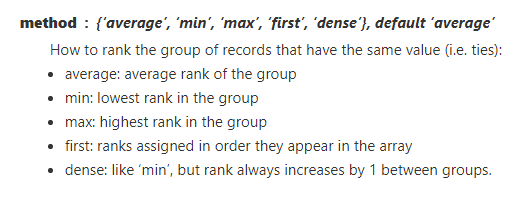

In [269]:
obj8 = pd.Series([7, -5, 9, 4, 2, 0, -4], index=['one', 'two', 'three', 'four', 'five', 'six', 'seven'])
obj8

one      7
two     -5
three    9
four     4
five     2
six      0
seven   -4
dtype: int64

In [270]:
obj8.rank(method='max', ascending=True).sort_values()

two      1.0
seven    2.0
six      3.0
five     4.0
four     5.0
one      6.0
three    7.0
dtype: float64

In [271]:
obj8

one      7
two     -5
three    9
four     4
five     2
six      0
seven   -4
dtype: int64

In [272]:
obj8.rank(ascending=False)

one      2.0
two      7.0
three    1.0
four     3.0
five     4.0
six      5.0
seven    6.0
dtype: float64

###***Índices de eixos com rótulos duplicados:***


In [273]:
obj9 = pd.Series(np.arange(10), index=['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd'])

obj9['b']

b    3
b    4
b    5
dtype: int64

In [274]:
# Confere se o index tem valores únicos

obj9.index.is_unique

False

In [275]:
obj9.is_unique

True

**Obs: Indexar um rótulo com várias
entradas devolve uma Series, enquanto entradas únicas devolvem
um valor escalar:**



In [276]:
obj9.c

c    6
c    7
c    8
dtype: int64

In [277]:
obj9.d

9

**Obs: Indexar um DF de index com várias
entradas devolve um DataFrame, enquanto entradas únicas devolvem
uma Series:**

In [278]:
df7 = pd.DataFrame(np.random.randn(5, 3), index=['a', 'a', 'b', 'b', 'c'])
df7

,0,1,2
a,0.652915,0.499057,0.996950
a,0.192341,-0.317434,0.311885
b,0.561365,0.146822,0.730360
b,-0.149495,1.117984,0.629953
c,0.406323,0.608068,-0.546333


In [279]:
df7.loc['b']

,0,1,2
b,0.561365,0.146822,0.730360
b,-0.149495,1.117984,0.629953


In [280]:
df7.loc['c']

0    0.406323
1    0.608068
2   -0.546333
Name: c, dtype: float64

###**Resumindo e calculando estatísticas descritivas:**

In [281]:
df8 = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                   index=['a', 'b', 'c', 'd'],
                   columns=['one', 'two'])
df8

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [282]:
df8.sum(axis=0)

one    9.25
two   -5.80
dtype: float64

In [283]:
df8.sum(axis=1, skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [284]:
#Retorna o indice onde o valor minimo está

df8.idxmin()

one    d
two    b
dtype: object

In [285]:
df8.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


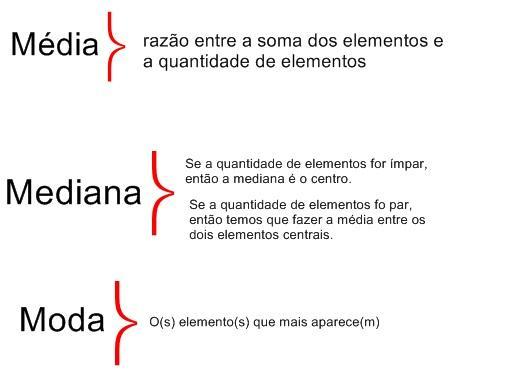

In [286]:
arrr = pd.DataFrame(list([6, 9, 10, 6, 2, 1,8, 7, 9]))
arrr

,0
0,6
1,9
2,10
3,6
4,2
5,1
6,8
7,7
8,9


In [287]:
arrr.mean()

0    6.444444
dtype: float64

In [288]:
arrr.median()

0    7.0
dtype: float64

In [289]:
arrr.mode()

,0
0,6
1,9


### **Covariância e Correlação:**

**A covariância mede a relação linear entre duas variáveis e a correlação mede tanto a força como a direção da relação linear entre duas variáveis:**

In [290]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
for ticker, data in all_data.items()})

***Calculando as mudanças percentuais nos preços:*** 

In [291]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-06-14,0.024578,-0.008263,0.007755,0.005215
2021-06-15,-0.006438,-0.004466,-0.005887,-0.002525
2021-06-16,0.003934,-0.010244,-0.003793,-0.002670
2021-06-17,0.012601,-0.015085,0.013676,0.005366
2021-06-18,-0.010092,-0.017033,-0.005634,-0.006358


***Calculando a covariância:***

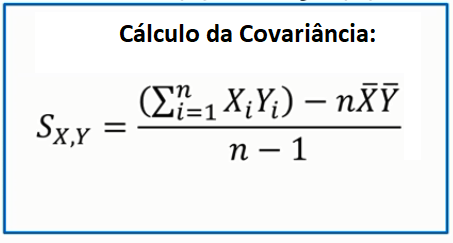

In [292]:
returns['MSFT'].cov(returns['IBM'])

0.0001502133877891011

***Calculando a correlação:***

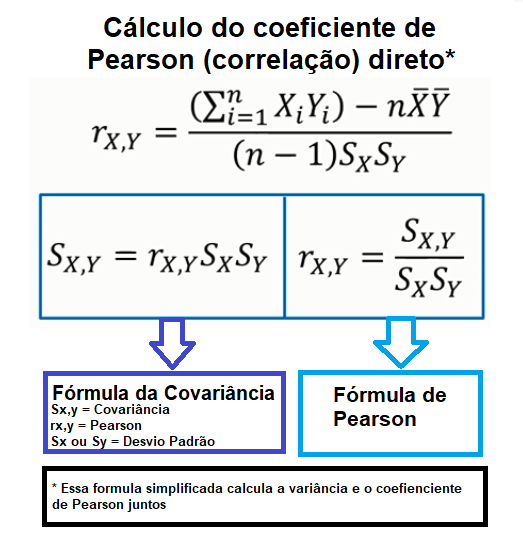



***rx,y = (soma dos resultados de xi.***yi**) - n (numero de itens) **(média de x e y)/ n-1 * (desvio padrão de x e y)***

In [293]:
returns['MSFT'].corr(returns['IBM'])

0.5295882176292394

***Quando feito com um DF, retorna um DF***

In [294]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.446048,0.726369,0.660306
IBM,0.446048,1.000000,0.529588,0.493453
MSFT,0.726369,0.529588,1.000000,0.774149
GOOG,0.660306,0.493453,0.774149,1.000000


In [295]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000364,0.000140,0.000240,0.000212
IBM,0.000140,0.000269,0.000150,0.000136
MSFT,0.000240,0.000150,0.000299,0.000225
GOOG,0.000212,0.000136,0.000225,0.000283


***Usando corrwith, podemos calcular
correlações de pares entre as colunas ou linhas de um DF
com outra Series ou um DF.***

In [296]:
returns.corrwith(returns.IBM)

AAPL    0.446048
IBM     1.000000
MSFT    0.529588
GOOG    0.493453
dtype: float64

In [297]:
pd.DataFrame(round(returns.corrwith(volume), 3))

,0
AAPL,-0.052
IBM,-0.102
MSFT,-0.060
GOOG,-0.115


***Passar axis=1 faz a correlação linha por linha***

In [298]:
pd.DataFrame(round(returns.corrwith(volume, axis=1), 3)).head()

,0
Date,
2016-06-22,NaN
2016-06-23,-0.476
2016-06-24,0.757
2016-06-27,0.125
2016-06-28,-0.040


### **Valores únicos, contadores de valores e pertinência**

In [301]:
obj10 =  pd.Series(['d', 'a', 'd', 'e', 'e', 'b', 'b', 'c', 'c'])
uniques = obj10.unique()
uniques

array(['d', 'a', 'e', 'b', 'c'], dtype=object)

In [302]:
obj10.value_counts()

e    2
c    2
b    2
d    2
a    1
dtype: int64

In [312]:
mascara = obj10.isin(['a', 'e', 'c'])
mascara

0    False
1     True
2    False
3     True
4     True
5    False
6    False
7     True
8     True
dtype: bool

In [313]:
obj10[mascara]

1    a
3    e
4    e
7    c
8    c
dtype: object

**Index.get_indexer pega o primeiro array, compara com o segundo, e traz de volta os índices do primeiro no segundo**

In [322]:
exemplo = pd.Series(['s', 'x', 'a'])
pd.Index(exemplo).get_indexer(['a', 's', 'x', 'k', 'm'])

array([ 2,  0,  1, -1, -1])

Obs: -1 significa que não está presente no indexador

In [325]:
df9 =  pd.DataFrame({'Col1': [1, 3, 4, 3, 4],'Col2': [2, 3, 1, 2, 3],'Col3': [1, 5, 2, 4, 4]})
df9

,Col1,Col2,Col3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [329]:
df9_resultado = df9.apply(pd.value_counts).fillna(0)
df9_resultado

,Col1,Col2,Col3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
